Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  fl

/var/folders/n3/wydd8tv51nb1r8klnw5tdjj00000gn/T/ipykernel_10224/1342956735.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Class', data=data, palette='viridis')


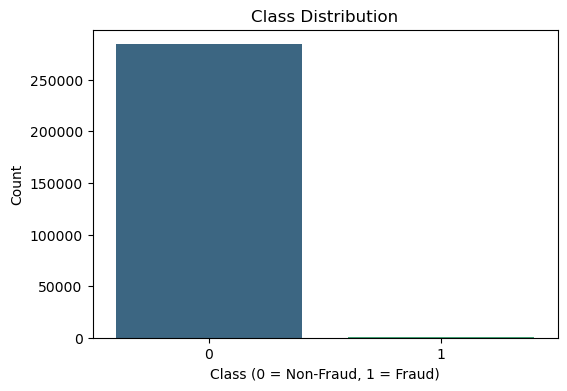


Fraud to Non-Fraud Ratio: 0.0017304750013189597


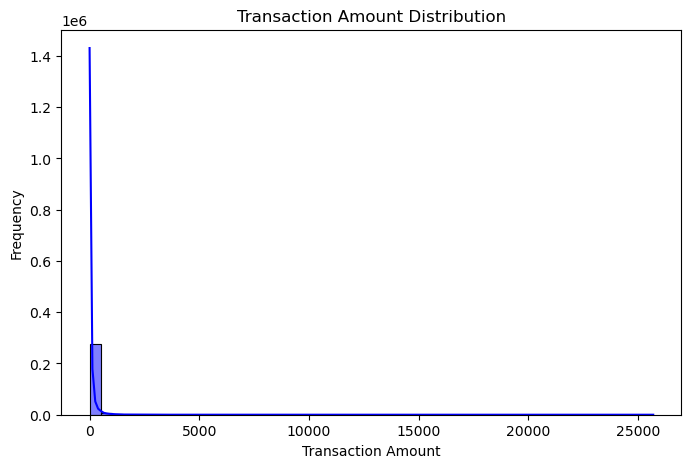

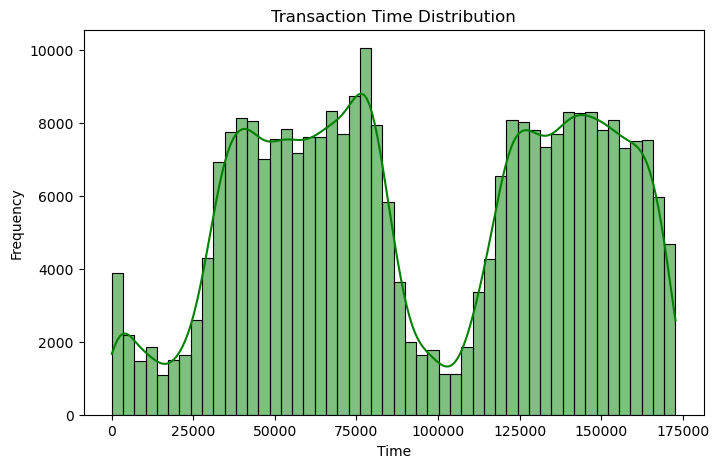

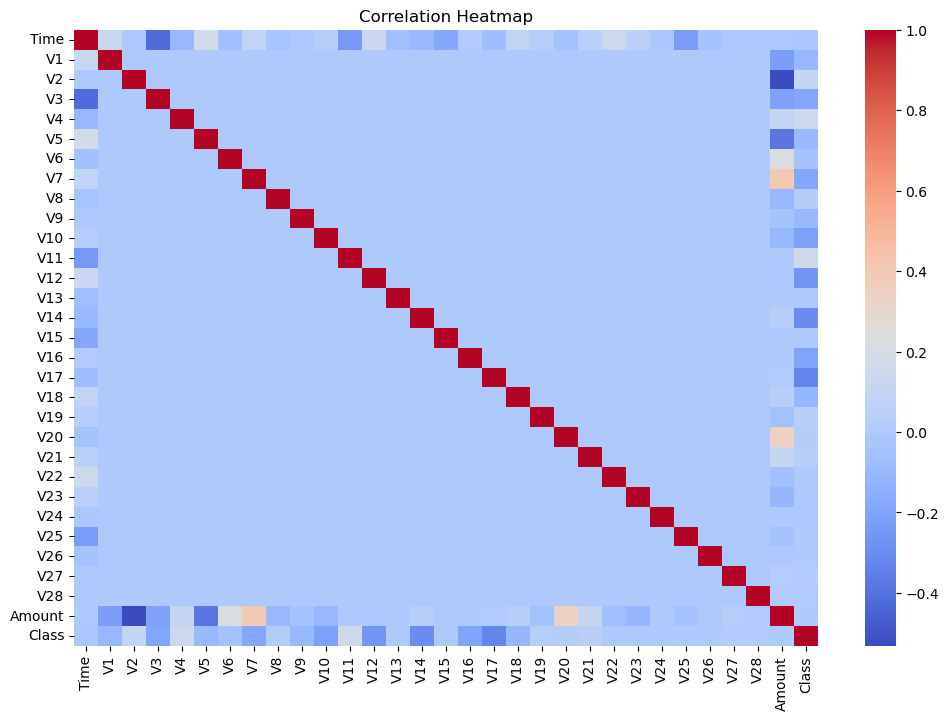


Missing Values in Dataset:
Series([], dtype: int64)


/var/folders/n3/wydd8tv51nb1r8klnw5tdjj00000gn/T/ipykernel_10224/1342956735.py:79: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Class', y='Amount', data=data, palette='viridis')


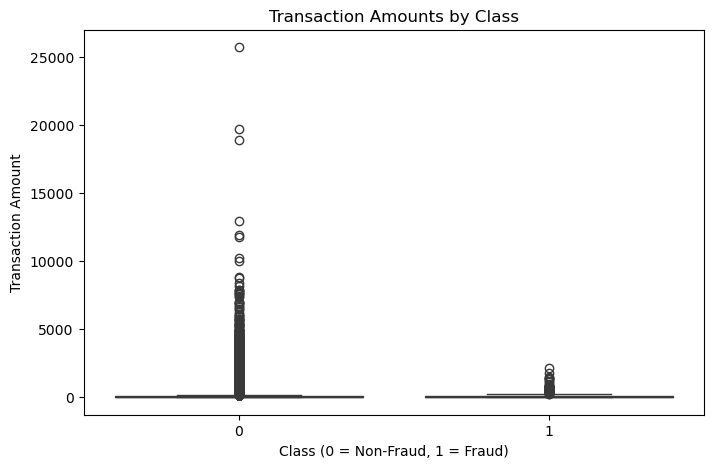

/var/folders/n3/wydd8tv51nb1r8klnw5tdjj00000gn/T/ipykernel_10224/1342956735.py:87: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Class', y='Time', data=data, palette='coolwarm')


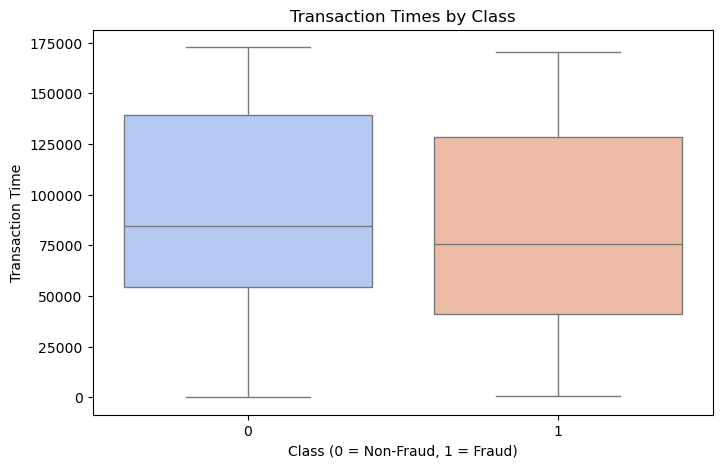

In [5]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import required libraries
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV

# Load the dataset
# Assuming the dataset is downloaded as 'creditcard2023.csv'
data = pd.read_csv('creditcard.csv')

# --- 1. Understand the Dataset ---
# Display basic info about the dataset
print("Dataset Information:")
print(data.info())

# Display basic statistics of the dataset
print("\nDataset Description:")
print(data.describe())

# Display first few rows
print("\nFirst 5 Rows of the Dataset:")
print(data.head())

# --- 2. Class Distribution ---
plt.figure(figsize=(6, 4))
sns.countplot(x='Class', data=data, palette='viridis')
plt.title("Class Distribution")
plt.xlabel("Class (0 = Non-Fraud, 1 = Fraud)")
plt.ylabel("Count")
plt.show()

# Check the ratio of fraud to non-fraud transactions
fraud_count = data['Class'].value_counts()
fraud_ratio = fraud_count[1] / fraud_count[0]
print("\nFraud to Non-Fraud Ratio:", fraud_ratio)

# --- 3. Feature Distributions ---
# Distribution of Transaction Amounts
plt.figure(figsize=(8, 5))
sns.histplot(data['Amount'], bins=50, kde=True, color='blue')
plt.title("Transaction Amount Distribution")
plt.xlabel("Transaction Amount")
plt.ylabel("Frequency")
plt.show()

# Distribution of Time Feature
plt.figure(figsize=(8, 5))
sns.histplot(data['Time'], bins=50, kde=True, color='green')
plt.title("Transaction Time Distribution")
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.show()

# --- 4. Correlation Analysis ---
# Compute correlation matrix
correlation_matrix = data.corr()

# Plot heatmap of correlations
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False)
plt.title("Correlation Heatmap")
plt.show()

# --- 5. Missing Values ---
# Check for missing values
missing_values = data.isnull().sum()
print("\nMissing Values in Dataset:")
print(missing_values[missing_values > 0])

# --- 6. Analyze Fraudulent Transactions ---
# Compare transaction amounts for fraud and non-fraud
plt.figure(figsize=(8, 5))
sns.boxplot(x='Class', y='Amount', data=data, palette='viridis')
plt.title("Transaction Amounts by Class")
plt.xlabel("Class (0 = Non-Fraud, 1 = Fraud)")
plt.ylabel("Transaction Amount")
plt.show()

# Compare transaction times for fraud and non-fraud
plt.figure(figsize=(8, 5))
sns.boxplot(x='Class', y='Time', data=data, palette='coolwarm')
plt.title("Transaction Times by Class")
plt.xlabel("Class (0 = Non-Fraud, 1 = Fraud)")
plt.ylabel("Transaction Time")
plt.show()


In [7]:
# --- 1. Handle Missing Values ---
# Check for missing values
print("Missing values before imputation:")
print(data.isnull().sum())

# Impute missing values
imputer = SimpleImputer(strategy='median')
data_imputed = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)

# Verify missing values are handled
print("\nMissing values after imputation:")
print(data_imputed.isnull().sum().sum())  # Should be 0

# --- 2. Scale Numerical Features ---
# Identify numerical columns to scale
numerical_columns = ['Time', 'Amount']  # Add other numerical columns if present

# Standardize numerical columns
scaler = StandardScaler()
data_imputed[numerical_columns] = scaler.fit_transform(data_imputed[numerical_columns])

# Verify scaling
print("\nFirst 5 rows of scaled numerical columns:")
print(data_imputed[numerical_columns].head())

# --- 3. Address Class Imbalance ---
# Separate features and target variable
X = data_imputed.drop(['Class'], axis=1)  # Drop the target column
y = data_imputed['Class']  # Target column

# Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_sm, y_sm = smote.fit_resample(X, y)

# Verify the new class distribution
print("\nClass distribution after SMOTE:")
print(pd.Series(y_sm).value_counts())

# --- 4. Final Preprocessed Dataset ---
# Combine resampled features and target for final dataset
data_preprocessed = pd.concat([pd.DataFrame(X_sm, columns=X.columns), pd.DataFrame(y_sm, columns=['Class'])], axis=1)

# Display the first few rows of the preprocessed dataset
print("\nFirst 5 rows of the preprocessed dataset:")
print(data_preprocessed.head())


Missing values before imputation:
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

Missing values after imputation:
0

First 5 rows of scaled numerical columns:
       Time    Amount
0 -1.996583  0.244964
1 -1.996583 -0.342475
2 -1.996562  1.160686
3 -1.996562  0.140534
4 -1.996541 -0.073403

Class distribution after SMOTE:
Class
0.0    284315
1.0    284315
Name: count, dtype: int64

First 5 rows of the preprocessed dataset:
       Time        V1        V2        V3        V4        V5        V6  \
0 -1.996583 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388   
1 -1.996583  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361   
2 -1.9965

In [9]:
# --- 1. Transaction Velocity ---
# Ensure 'Time' is numeric and sorted
data_preprocessed['Time'] = pd.to_numeric(data_preprocessed['Time'], errors='coerce')
data_preprocessed = data_preprocessed.sort_values(by='Time')

# Calculate transaction count in a rolling 1-hour window
data_preprocessed['transaction_count'] = (
    data_preprocessed['Time'].rolling(window=3600, min_periods=1).count()
)

# --- 2. Rolling Statistics ---
data_preprocessed['rolling_avg_amount'] = (
    data_preprocessed['Amount'].rolling(window=5, min_periods=1).mean().fillna(0)
)

# --- 3. Dimensionality Reduction with PCA ---
# Select only numeric columns for PCA
X = data_preprocessed.select_dtypes(include=['float64', 'int64']).drop(['Class'], axis=1)

# Ensure no NaN values
X = X.fillna(0)

# Apply PCA to reduce dimensions to 95% variance
pca = PCA(n_components=0.95, random_state=42)
X_pca = pca.fit_transform(X)

# Replace original features with PCA components
X_pca_df = pd.DataFrame(X_pca, columns=[f'PCA_{i+1}' for i in range(X_pca.shape[1])])

# Add target back to PCA-transformed data
data_pca = pd.concat([X_pca_df, data_preprocessed['Class'].reset_index(drop=True)], axis=1)

# --- 4. Final Feature Set ---
# Display the final dataset
print("\nFirst 5 rows of the dataset with new features (PCA applied):")
print(data_pca.head())



First 5 rows of the dataset with new features (PCA applied):
         PCA_1  Class
0 -3587.618298    0.0
1 -3586.617080    0.0
2 -3585.618399    0.0
3 -3584.618574    0.0
4 -3583.618084    0.0



--- Logistic Regression ---
Classification Report (Logistic Regression):
              precision    recall  f1-score   support

         0.0       0.98      0.01      0.02     56863
         1.0       0.50      1.00      0.67     56863

    accuracy                           0.51    113726
   macro avg       0.74      0.51      0.35    113726
weighted avg       0.74      0.51      0.35    113726

ROC-AUC Score (Logistic Regression): 0.9609985677590467

--- Random Forest ---
Classification Report (Random Forest):
              precision    recall  f1-score   support

         0.0       0.88      0.97      0.92     56863
         1.0       0.97      0.86      0.91     56863

    accuracy                           0.92    113726
   macro avg       0.92      0.92      0.92    113726
weighted avg       0.92      0.92      0.92    113726

ROC-AUC Score (Random Forest): 0.954403402166074

--- XGBoost ---


/opt/anaconda3/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [01:57:20] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Classification Report (XGBoost):
              precision    recall  f1-score   support

         0.0       0.88      0.98      0.93     56863
         1.0       0.97      0.87      0.92     56863

    accuracy                           0.92    113726
   macro avg       0.93      0.92      0.92    113726
weighted avg       0.93      0.92      0.92    113726

ROC-AUC Score (XGBoost): 0.9628730240770225


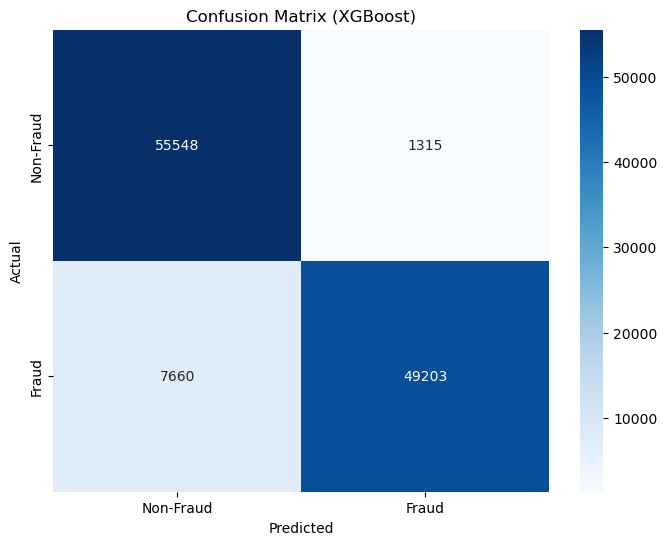

In [11]:
# Import required libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# --- Split Data into Training and Testing Sets ---
X = data_pca.drop(['Class'], axis=1)
y = data_pca['Class']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# --- Train Models ---
# 1. Logistic Regression
print("\n--- Logistic Regression ---")
log_reg = LogisticRegression(random_state=42, class_weight='balanced')
log_reg.fit(X_train, y_train)
y_pred_lr = log_reg.predict(X_test)
y_prob_lr = log_reg.predict_proba(X_test)[:, 1]
print("Classification Report (Logistic Regression):")
print(classification_report(y_test, y_pred_lr))
print("ROC-AUC Score (Logistic Regression):", roc_auc_score(y_test, y_prob_lr))

# 2. Random Forest
print("\n--- Random Forest ---")
rf = RandomForestClassifier(random_state=42, class_weight='balanced', n_estimators=100)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
y_prob_rf = rf.predict_proba(X_test)[:, 1]
print("Classification Report (Random Forest):")
print(classification_report(y_test, y_pred_rf))
print("ROC-AUC Score (Random Forest):", roc_auc_score(y_test, y_prob_rf))

# 3. XGBoost
print("\n--- XGBoost ---")
xgb = XGBClassifier(random_state=42, scale_pos_weight=1, use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)
y_prob_xgb = xgb.predict_proba(X_test)[:, 1]
print("Classification Report (XGBoost):")
print(classification_report(y_test, y_pred_xgb))
print("ROC-AUC Score (XGBoost):", roc_auc_score(y_test, y_prob_xgb))

# --- Confusion Matrix Visualization for the Best Model (XGBoost in this case) ---
conf_matrix = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
plt.title('Confusion Matrix (XGBoost)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [ ]:
XGBoost Tuning

In [28]:
param_dist_xgb = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5],
    'learning_rate': [0.01, 0.1],
    'subsample': [0.8],
    'colsample_bytree': [0.8],
    'scale_pos_weight': [1, 25],
    'gamma': [0]
}

random_xgb = RandomizedSearchCV(
    estimator=XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'),
    param_distributions=param_dist_xgb,
    n_iter=10,  # Reduce combinations
    scoring='f1',
    cv=2,       # Reduce folds
    verbose=2,
    random_state=42,
    n_jobs=2    # Limit CPU cores
)

random_xgb.fit(X_train, y_train)
print("Best Parameters (Randomized Search):", random_xgb.best_params_)


Fitting 2 folds for each of 10 candidates, totalling 20 fits


94713.64s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
94713.64s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
/opt/anaconda3/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [02:35:08] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [02:35:08] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [02:35:08] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [02:35:08]

Best Parameters (Randomized Search): {'subsample': 0.8, 'scale_pos_weight': 1, 'n_estimators': 200, 'max_depth': 5, 'learning_rate': 0.1, 'gamma': 0, 'colsample_bytree': 0.8}


Random Forest Tuning

In [30]:
from sklearn.model_selection import GridSearchCV

# Parameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'class_weight': ['balanced']
}

# Grid Search for Random Forest
grid_rf = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid_rf,
    scoring='f1',
    cv=3,
    verbose=2,
    n_jobs=-1
)
grid_rf.fit(X_train, y_train)

# Best parameters and model
print("Best Parameters for Random Forest:", grid_rf.best_params_)
best_rf = grid_rf.best_estimator_


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, scale_pos_weight=1, subsample=0.8; total time=   0.4s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, scale_pos_weight=25, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=5, n_estimators=100, scale_pos_weight=25, subsample=0.8; total time=   0.4s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=5, n_estimators=200, scale_pos_weight=1, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=5, n_estimators=100, scale_pos_weight=25, subsample=0.8; total time=   0.5s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=200, scale_pos_weight=25, subsample=0.8; total time=   0.6s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=100, scale_pos_weight=1, subsample=0.8; tota

94778.89s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
94778.94s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
94778.94s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
94778.95s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
94778.95s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
94778.96s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
94778.97s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
94778.99s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


KeyboardInterrupt: 

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

# Define the parameter grid for Random Forest
param_dist_rf = {
    'n_estimators': [100, 200, 300, 500],  # Number of trees
    'max_depth': [10, 20, None],           # Maximum depth of trees
    'min_samples_split': [2, 5, 10],       # Minimum samples to split a node
    'min_samples_leaf': [1, 2, 4],         # Minimum samples at a leaf node
    'max_features': ['sqrt', 'log2', None],# Number of features to consider when looking for best split
    'class_weight': ['balanced'],          # Balance classes for imbalanced data
}

# Randomized Search for Random Forest
random_rf = RandomizedSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_distributions=param_dist_rf,
    n_iter=30,                  # Number of parameter combinations to try
    scoring='f1',               # Optimize F1-score
    cv=3,                       # 3-fold cross-validation
    verbose=2,                  # Detailed output
    random_state=42,            # Ensures reproducibility
    n_jobs=-1                   # Use all available processors
)

# Fit the RandomizedSearchCV on the training data
random_rf.fit(X_train, y_train)

# Output the best parameters
print("Best Parameters (Randomized Search):", random_rf.best_params_)
best_rf = random_rf.best_estimator_
